# **ANÁLISE COMPLETA DOS DADOS TABULARES DA COVID-19**

<font size="4">
<b><font color="red">Etapa 1</font></b>: Carga dos dados no notebook Python
</font>


In [1]:
#Upload do dataset COVID19 para a nuvem Google, onde está o Google Colab
from google.colab import files
uploaded = files.upload()


Saving COVID19_Dados.csv to COVID19_Dados.csv


<font size="4">
<b><font color="red">Etapa 2</font></b>: Importação dos dados para um dataframe Pandas
</font>


In [2]:
#Importação do dataset COVID19 para um formato dataframe
import pandas as pd

Covid = pd.read_csv('COVID19_Dados.csv', sep=',')
Covid.head()

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2             1              2   
2   55        97         1  ...       2        2             2              2   
3   53         2         2  ...       2        2             2              2   
4   68        97         1  ...       2        2             1              2   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  ICU  
0               2        2              2        2                     3   97  
1               2        1              1        2                     5   97  
2               2        2              2        2                     3    2  
3               2        2              2        2                     7   97  
4               2        2              2        2                     3   97  

[5 rows x 21 columns]

<font size="4">
<b><font color="red">Etapa 3</font></b>: Verificação das dimensões do dataframe
</font>


In [3]:
# Contar número de linhas e colunas
linhas, colunas = Covid.shape

print(f"Número de linhas: {linhas}")
print(f"Número de colunas: {colunas}")


Número de linhas: 1048575
Número de colunas: 21


### **Interpretação inicial da base de dados**
1.   Base de dados covid-19 tem <b><font color="yellow">1.048.575 linhas </font></b>e <b><font color="yellow">21 colunas</font></b>
2. A base é proveniente do Kaggle (https://www.kaggle.com/datasets/meirnizri/covid19-dataset)
3. Os dados foram fornecidos pelo governo do México e, portanto, referem-se a pacientes daquele país
3.   Os registros são referentes a pacientes únicos. Portanto, ***não há duplicações na base***
4.   Cada uma das 21 colunas da base traz características clínicas e pessoais dos pacientes
5. Como será visto mais à frente, códigos de 97 a 99 não necessariamente são dados faltantes (missing data)

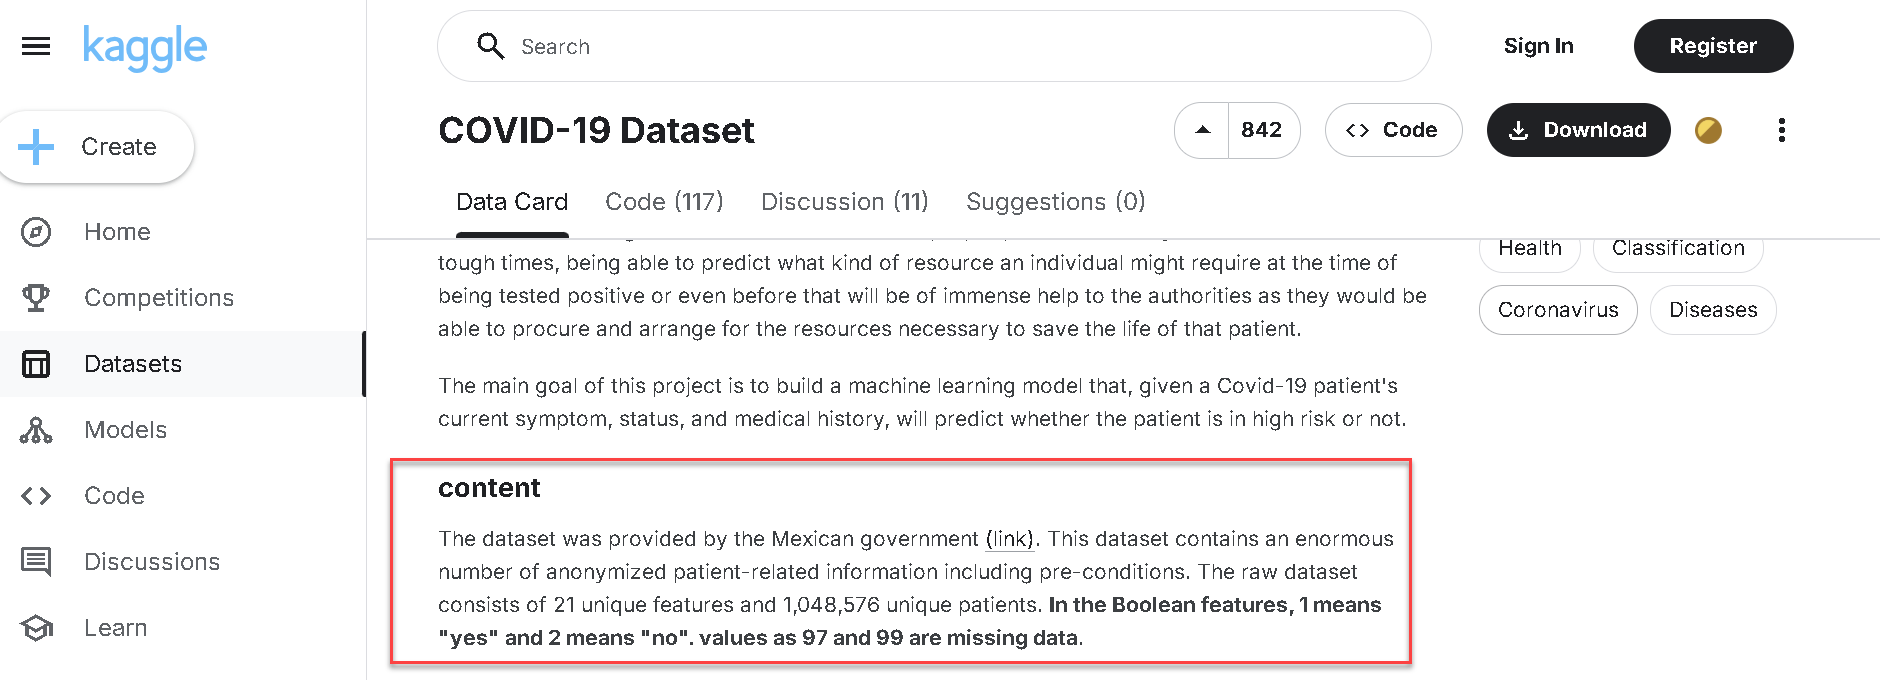




<font size="4">
<b><font color="red">Etapa 4</font></b>: Descrição das variáveis do dataset
</font>


In [4]:
# Descrição de cada uma das variáveis da base Covid
# Dicionário com a descrição das variáveis
import pandas as pd

# Ordem original das variáveis no dataset
variaveis_dataset = [
    "sex", "age", "patient_type", "intubed", "pneumonia", "pregnant", "diabetes", "copd",
    "asthma", "inmsupr", "hypertension", "other_disease", "cardiovascular", "obesity", "renal_chronic",
    "tobacco", "usmer", "medical_unit", "icu", "date_died", "clasiffication_final"
]

# Dicionário com os tipos e descrições
descricao_completa = {
    "sex": ("Categórica", "Sexo do paciente (masculino ou feminino)"),
    "age": ("Numérica", "Idade do paciente (em anos)"),
    "patient_type": ("Binária", "Tipo de paciente: hospitalizado ou não"),
    "intubed": ("Binária", "Se o paciente foi intubado"),
    "pneumonia": ("Binária", "Presença de pneumonia"),
    "pregnant": ("Binária", "Gestante (válido apenas para sexo feminino)"),
    "diabetes": ("Binária", "Diagnóstico de diabetes"),
    "copd": ("Binária", "Doença pulmonar obstrutiva crônica (DPOC)"),
    "asthma": ("Binária", "Asma"),
    "inmsupr": ("Binária", "Imunossupressão (condições ou tratamento)"),
    "hypertension": ("Binária", "Hipertensão arterial"),
    "other_disease": ("Binária", "Outras doenças não especificadas"),
    "cardiovascular": ("Binária", "Doença cardiovascular"),
    "obesity": ("Binária", "Obesidade"),
    "renal_chronic": ("Binária", "Doença renal crônica"),
    "tobacco": ("Binária", "Histórico de tabagismo"),
    "usmer": ("Binária", "Atendido em unidade USMER (monitorada pelo governo)"),
    "medical_unit": ("Categórica", "Tipo de unidade médica de atendimento"),
    "icu": ("Binária", "Se o paciente foi internado na UTI"),
    "date_died": ("Data", "Data do óbito (se aplicável)"),
    "clasiffication_final": ("Categórica", ("1-3 (com covid), >=4 (não ou inconclusivo)"))

}

# Criar DataFrame com a ordem desejada
Covid_descricao = pd.DataFrame([
    {
        "Variável": var,
        "Tipo": descricao_completa[var][0],
        "Descrição": descricao_completa[var][1]
    }
    for var in variaveis_dataset
])

# Exibir o DataFrame no Colab
Covid_descricao


Variável        Tipo  \
0                    sex  Categórica   
1                    age    Numérica   
2           patient_type     Binária   
3                intubed     Binária   
4              pneumonia     Binária   
5               pregnant     Binária   
6               diabetes     Binária   
7                   copd     Binária   
8                 asthma     Binária   
9                inmsupr     Binária   
10          hypertension     Binária   
11         other_disease     Binária   
12        cardiovascular     Binária   
13               obesity     Binária   
14         renal_chronic     Binária   
15               tobacco     Binária   
16                 usmer     Binária   
17          medical_unit  Categórica   
18                   icu     Binária   
19             date_died        Data   
20  clasiffication_final  Categórica   

                                            Descrição  
0            Sexo do paciente (masculino ou feminino)  
1                         Idade do paciente (em anos)  
2              Tipo de paciente: hospitalizado ou não  
3                          Se o paciente foi intubado  
4                               Presença de pneumonia  
5         Gestante (válido apenas para sexo feminino)  
6                             Diagnóstico de diabetes  
7           Doença pulmonar obstrutiva crônica (DPOC)  
8                                                Asma  
9           Imunossupressão (condições ou tratamento)  
10                               Hipertensão arterial  
11                   Outras doenças não especificadas  
12                              Doença cardiovascular  
13                                          Obesidade  
14                               Doença renal crônica  
15                             Histórico de tabagismo  
16  Atendido em unidade USMER (monitorada pelo gov...  
17              Tipo de unidade médica de atendimento  
18                 Se o paciente foi internado na UTI  
19                       Data do óbito (se aplicável)  
20         1-3 (com covid), >=4 (não ou inconclusivo)

<font size="4">
<b><font color="red">Etapa 5</font></b>: Análise descritiva das variáveis do dataset
</font>


In [5]:
#Análise descritiva das variáveis da base (essencialmente variáveis categóricas, com exceção da variável idade)
import plotly.express as px
import pandas as pd

def plotly_distributions(Covid):
    for column in Covid.columns:
        if column in ['morreu', 'alto_risco']:
            continue

        Covid[column] = Covid[column].fillna('Desconhecido')

        label_map = None
        ordered_labels = None
        force_same_color = False
        column_label = column
        x_label = column

        # AGE
        if column == 'AGE':
            x_label = 'AGE (Em anos)'

        # Substituições padronizadas para 97, 98, 99
        standard_map = {
            97: 'Não se aplica',
            98: 'Se ignora',
            99: 'Não especificado'
        }

        # SEX
        if column == 'SEX':
            label_map = {
                1: 'Feminino', 2: 'Masculino', **standard_map
            }
            ordered_labels = ['Feminino', 'Masculino', 'Não se aplica', 'Se ignora', 'Não especificado']

        # PATIENT_TYPE
        elif column == 'PATIENT_TYPE':
            label_map = {
                1: 'Ambulatorial', 2: 'Hospitalizado', **standard_map
            }
            ordered_labels = ['Ambulatorial', 'Hospitalizado', 'Não se aplica', 'Se ignora', 'Não especificado']

        # PREGNANT
        elif column == 'PREGNANT':
            label_map = {
                1: 'Sim', 2: 'Não', **standard_map
            }
            ordered_labels = ['Sim', 'Não', 'Não se aplica', 'Se ignora', 'Não especificado']

        # CLASIFFICATION_FINAL
        elif column == 'CLASIFFICATION_FINAL':
            ordered_labels = ['1', '2', '3', '4', '5', '6', '7']
            x_label = "CLASIFFICATION_FINAL<br><sub>(1 a 3: com COVID, 4 a 7: sem ou inconclusivo)</sub>"

        # Binárias com 1,2,97,98,99
        elif set(Covid[column].dropna().unique()).issubset({1, 2, 97, 98, 99}):
            label_map = {
                1: 'Sim', 2: 'Não', **standard_map
            }
            ordered_labels = ['Sim', 'Não', 'Não se aplica', 'Se ignora', 'Não especificado']

        # DATE_DIED - tratamento especial
        if column == 'DATE_DIED':
            total = len(Covid)
            nao_morreram = (Covid['DATE_DIED'] == '9999-99-99').sum()
            morreram = total - nao_morreram
            pct_nao = (nao_morreram / total) * 100

            # Filtrar somente datas reais de óbito
            filtered = Covid[Covid['DATE_DIED'] != '9999-99-99']
            freq_df = filtered['DATE_DIED'].value_counts().reset_index()
            freq_df.columns = ['DATE_DIED', 'frequencia']
            freq_df = freq_df.sort_values(by='DATE_DIED').head(20)
            freq_df['texto'] = freq_df['frequencia'].astype(str)

            x_label = f"Data de Óbito<br><sub>(Inclui somente óbitos: {morreram} pacientes, {100 - pct_nao:.1f}%)</sub>"
            titulo = "<b>Distribuição da variável: <span style='color:red'>DATE_DIED</span></b>"

            fig = px.bar(
                freq_df,
                x='DATE_DIED',
                y='frequencia',
                text='texto',
                title=titulo,
                labels={'frequencia': 'Frequência Absoluta', 'DATE_DIED': x_label},
                color_discrete_sequence=['#4682B4']
            )
            fig.update_traces(textposition='outside')
            fig.update_layout(
                yaxis_title='Frequência Absoluta',
                xaxis={'categoryorder': 'category ascending'},
                showlegend=False,
                title={'x': 0.5}
            )
            fig.show()
            continue

        # Categóricas com poucos valores
        if Covid[column].dtype == 'object' or Covid[column].nunique(dropna=False) < 30:
            series = Covid[column].replace(label_map) if label_map else Covid[column]

            freq_abs = series.value_counts(dropna=False)
            freq_rel = series.value_counts(normalize=True, dropna=False) * 100

            freq_df = pd.DataFrame({
                column: freq_abs.index.astype(str),
                'frequencia': freq_abs.values,
                'percentual': freq_rel.values.round(1)
            })

            freq_df['texto'] = freq_df.apply(
                lambda row: f"{int(row['frequencia'])} ({row['percentual']:.1f}%)", axis=1
            )

            if ordered_labels:
                freq_df[column] = pd.Categorical(freq_df[column], categories=ordered_labels, ordered=True)
                freq_df = freq_df.sort_values(by=column)

            titulo = f"<b>Distribuição da variável: <span style='color:red'>{column.upper()}</span></b>"

            fig = px.bar(
                freq_df,
                x=column,
                y='frequencia',
                text='texto',
                title=titulo,
                labels={'frequencia': 'Frequência Absoluta', column: x_label},
                color=column,
                color_discrete_sequence=px.colors.qualitative.Pastel
            )
            fig.update_traces(textposition='outside')
            fig.update_layout(
                yaxis_title='Frequência Absoluta',
                xaxis={'categoryorder': 'array', 'categoryarray': ordered_labels if ordered_labels else freq_df[column].tolist()},
                showlegend=False,
                title={'x': 0.5}
            )
            fig.show()

        # Numéricas
        else:
            titulo = f"<b>Distribuição da variável: <span style='color:red'>{column.upper()}</span></b>"
            fig = px.histogram(
                Covid,
                x=column,
                nbins=20,
                title=titulo,
                labels={column: x_label, 'count': 'Frequência Absoluta'},
                color_discrete_sequence=['cornflowerblue']
            )
            fig.update_layout(
                yaxis_title='Frequência Absoluta',
                title={'x': 0.5}
            )
            fig.show()

# Executar a função
plotly_distributions(Covid)

### **Insights iniciais obtidos a partir da análise descritiva dos dados**
1.   Variável  <b><font color="red">USMER</font></b> - Cerca de  <b><font color="yellow">37% </font></b> dos pacientes foram tratados em uma unidade de vigilância epidemiológica do governo mexicano.
2.   Variável  <b><font color="red">MEDICAL_UNIT</font></b> - Cerca de  <b><font color="yellow">87% </font></b> dos pacientes foram tratados em dois tipos distintos de unidades médicas, entre 14 existentes. No entanto, não foi possível ter clareza o que significam os domínios dessa variável.
2. Variável  <b><font color="red">SEX</font></b> - A distribuição de homens e mulheres na base é extremamente equilibrada, cerca de <b><font color="yellow">50% </font></b> para cada.
4. Variável  <b><font color="red">PATIENT_TYPE</font></b> - Cerca de  <b><font color="yellow">81% </font></b> dos pacientes não precisaram ser internados, receberam tratamento ambulatorial.
5. Variável  <b><font color="red">DATE_DIED</font></b> - Cerca de  <b><font color="yellow">7% </font></b> dos pacientes faleceram por conta da Covid-19 e a maioria de óbitos ocorreu entre mai/20 e jul/20.
6. Variável  <b><font color="red">INTUBED</font></b> - Cerca de  <b><font color="yellow">3% </font></b> dos pacientes necessitaram de entubamento, como consequência de um agravamento da doença.
7. Variável  <b><font color="red">PNEUMONIA</font></b> - Cerca de  <b><font color="yellow">13% </font></b> foram diagnosticados com pneumonia.
7. Variável  <b><font color="red">AGE</font></b> - A distribuição da idade dos pacientes é simétrica, com uma maior concentração em cerca de <b><font color="yellow">35-40 anos </font></b>.
8. Variável  <b><font color="red">PREGNANT</font></b> - A incidência de gravidez na base foi de menos de <b><font color="yellow">1% </font></b>.
9. Variável  <b><font color="red">DIABETES</font></b> - Cerca de  <b><font color="yellow">12% </font></b> dos pacientes apresentavam quadro de diabetes.
10. Variável  <b><font color="red">DPOC</font></b> - Pouco mais de <b><font color="yellow">1% </font></b> dos pacientes apresentavam quadro de DPOC (distúrbio progressivo obsterutivo crônico).
11. Variável  <b><font color="red">ASHTMA</font></b> - Cerca de <b><font color="yellow">3% </font></b> dos pacientes apresentavam quadros de asma.
12. Variável  <b><font color="red">INMSUPR</font></b> - Pouco mais de <b><font color="yellow">1% </font></b> dos pacientes apresentavam quadro de imunosupressão.
13. Variável  <b><font color="red">HIPERTENSION</font></b> - Ao redor de <b><font color="yellow">16% </font></b> dos pacientes apresentavam quadro de hipertensão arterial.
14. Variável  <b><font color="red">OTHER_DISEASE</font></b> - Pouco menos de <b><font color="yellow">3% </font></b> dos pacientes apresentavam registros de outras doenças.
15. Variável  <b><font color="red">CARDIOVASCULAR</font></b> - Ao redor de <b><font color="yellow">2% </font></b> dos pacientes apresentavam doenças cardiovasculares.
16. Variável  <b><font color="red">OBESITY</font></b> - Cerca de <b><font color="yellow">15% </font></b> dos pacientes apresentavam quadros de obesidade.
17. Variável  <b><font color="red">RENAL_CHRONIC</font></b> - Pouco menos de <b><font color="yellow">2% </font></b> dos pacientes apresentavam contexto de doença renal crônica.
18. Variável  <b><font color="red">TOBACCO</font></b> - Por volta de <b><font color="yellow">8% </font></b> dos pacientes apresentavam quadro de tabagismo.
19. Variável  <b><font color="red">CLASSIFICATION_FINAL</font></b> - Cerca de  <b><font color="yellow">37% </font></b> dos pacientes foram diagnosticados com Covid-19.
20. Variável  <b><font color="red">ICU</font></b> - Pouco menos de <b><font color="yellow">2% </font></b> dos pacientes precisaram de UTI por precaução ou gravidade do quadro.

<font size="4">
<b><font color="red">Etapa 6</font></b>: Teste de 2 configurações de variável resposta para o desenvolvimento de um modelo preditivo
</font>


In [6]:
#Teste de duas diferentes configurações da variável resposta
import pandas as pd
import plotly.express as px

# Cenário I – Criar variável 'morreu'
Covid['PATIENT_DIED'] = Covid['DATE_DIED'].apply(lambda x: '0' if x == '9999-99-99' else '1')

# Cenário II – Criar variável 'alto_risco'
Covid['HIGH_RISK'] = (
    (Covid['INTUBED'] == 1) |
    (Covid['ICU'] == 1) |
    (Covid['PATIENT_DIED'] == '1')
).astype(int).astype(str)

# Função com rótulos "Sim"/"Não" e títulos formatados
def plot_target_distribution(Covid, target_col):
    label_map = {'0': 'Não', '1': 'Sim'}
    series = Covid[target_col].map(label_map)

    freq_df = (
        series.value_counts(dropna=False)
        .rename_axis(target_col)
        .reset_index(name='frequencia')
    )
    freq_df['percentual'] = (freq_df['frequencia'] / freq_df['frequencia'].sum()) * 100
    freq_df['label'] = freq_df.apply(
        lambda row: f"{row['frequencia']} ({row['percentual']:.1f}%)", axis=1
    )

    # Título formatado
    titulo = f"<b>Distribuição da variável: <span style='color:red'>{target_col.upper()}</span></b>"

    # Cores fixas
    color_map = {'Não': '#006400', 'Sim': '#FF0000'}

    fig = px.bar(
        freq_df,
        x=target_col,
        y='frequencia',
        text='label',
        color=target_col,
        title=titulo,
        labels={'frequencia': 'Frequência Absoluta', target_col: target_col.upper()},
        color_discrete_map=color_map
    )
    fig.update_traces(textposition='outside')
    fig.update_layout(
        yaxis_title='Frequência Absoluta',
        xaxis_title=target_col.upper(),
        showlegend=False,
        title={'x': 0.5}
    )
    fig.show()

# Gerar gráficos com rótulos Sim/Não
plot_target_distribution(Covid, 'PATIENT_DIED')
plot_target_distribution(Covid, 'HIGH_RISK')

### **Insights sobre as 2 variáveis resposta**
1.   Variável  <b><font color="red">PATIENT_DIED</font></b> - Considera quem morreu ou não, o que ocorreu com cerca de <b><font color="yellow">7% </font></b> dos pacientes.
2.   Variável  <b><font color="red">HIGH_RISK</font></b> - Cerca de  <b><font color="yellow">9% </font></b> dos pacientes evoluiram a quadros graves ou vieram a falecer. Essa é a variavel resposta a ser modelada. Queremos modelar a probabilidade de pacientes chegarem a estes estágios, de forma a priorizar atendimentos em um momento inicial, de uma maneira mais eficiente.

<font size="4">
<b><font color="red">Etapa 7</font></b>: Análise do percentual de dados faltantes por variável
</font>


In [7]:
# Percentual de dado faltante por variável
import pandas as pd
import plotly.express as px

# Identifica o nome exato da coluna de data de óbito
col_died = next((col for col in Covid.columns if col.lower() == 'date_died'), None)

if not col_died:
    raise ValueError("A variável 'date_died' não foi encontrada no DataFrame.")

# Lista de colunas do DataFrame, exceto 'AGE'
variaveis = [col for col in Covid.columns if col != 'AGE']

# Função para contar dados ausentes
def contar_missing(col):
    if col == col_died:
        valores_str = Covid[col].astype(str).str.strip()
        missing = valores_str.eq('9999-99-99') | Covid[col].isna()
    else:
        missing = Covid[col].isin([98, 99])
    return missing.sum(), round(100 * missing.mean(), 2)

# Calcula missing
resumo = []
for col in variaveis:
    qtd, perc = contar_missing(col)
    resumo.append({'Variável': col, 'Qtd Missing': qtd, '% Missing': perc})

# DataFrame resumo
resumo_df = pd.DataFrame(resumo)

# Extrai info da coluna de óbito
info_died = resumo_df[resumo_df['Variável'] == col_died]
qtd_died = int(info_died['Qtd Missing'].values[0])
perc_died = float(info_died['% Missing'].values[0])

# Filtra variáveis com dados ausentes, exceto date_died
resumo_df = resumo_df[(resumo_df['% Missing'] > 0) & (resumo_df['Variável'] != col_died)]

# Ordena
resumo_df = resumo_df.sort_values(by='% Missing', ascending=False)

# Gera gráfico com Plotly
fig = px.bar(
    resumo_df,
    x='Variável',
    y='% Missing',
    hover_data={'Qtd Missing': True},
    text='% Missing',
    title='<b>% de dado faltante por variável</b>'
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(
    xaxis_title='Variável',
    yaxis_title='% de Dados Ausentes',
    title_font_size=20,
    margin=dict(t=80, b=140),
    annotations=[
        dict(
            text=(
                f"Obs: As variáveis '{col_died}' e 'AGE' foram excluídas do gráfico.<br>"
                f"'{col_died}' possui {qtd_died:,} registros ausentes ({perc_died:.2f}%),<br>"
                f"que indicam pacientes que não morreram e, portanto, não têm data de óbito.<br>"
                f"'AGE' foi removida pois os valores 98 e 99 representam idades válidas."
            ),
            xref="paper", yref="paper",
            x=0, y=-0.40,
            showarrow=False,
            font=dict(size=12),
            align="left"
        )
    ]
)

fig.show()

### **Insights sobre os percentuais de dados faltantes por variável**
1.   As variáveis <b><font color="red">DATE_DIED</font></b> e <b><font color="red">AGE</font></b> não foram considerados nesse gráfico
2.   O % de dados ausentes foi relativamente pequeno no geral
3.   A variável <b><font color="red">PNEUMONIA</font></b> foi a que teve maior % de dados ausentes
4.   O código <b><font color="green">97</font></b> não é dado faltante e isso será mostrado a seguir.

<font size="4">
<b><font color="red">Etapa 8</font></b>: Análise do código 97 para as variáveis do dataset
</font>


In [8]:
# Cópia da base original
df = Covid.copy()

# Dicionários corrigidos de rótulos
sexo_labels = {
    1: 'Feminino',
    2: 'Masculino',
    99: 'Ignorado',
    9: 'Ignorado'
}

gravidez_labels = {
    1: 'Sim',
    2: 'Não',
    97: 'Não Aplicável',
    98: 'Ignorado',
    99: 'Desconhecido'
}

intubed_labels = {
    1: 'Sim',
    2: 'Não',
    97: 'Não Aplicável',
    98: 'Ignorado',
    99: 'Desconhecido'
}

icu_labels = intubed_labels

patient_type_labels = {
    1: 'Ambulatório',
    2: 'Internado',
    97: 'Não Aplicável',
    98: 'Ignorado',
    99: 'Desconhecido'
}

# Aplicar os rótulos
df['SEX_LABEL'] = df['SEX'].map(sexo_labels).fillna('Desconhecido')
df['PREGNANT_LABEL'] = df['PREGNANT'].map(gravidez_labels).fillna('Desconhecido')
df['INTUBED_LABEL'] = df['INTUBED'].map(intubed_labels).fillna('Desconhecido')
df['ICU_LABEL'] = df['ICU'].map(icu_labels).fillna('Desconhecido')
df['PATIENT_TYPE_LABEL'] = df['PATIENT_TYPE'].map(patient_type_labels).fillna('Desconhecido')

# Cruzamentos
cross_pregnant_sex = pd.crosstab(df['PREGNANT_LABEL'], df['SEX_LABEL'])
cross_intubed_patient = pd.crosstab(df['INTUBED_LABEL'], df['PATIENT_TYPE_LABEL'])
cross_icu_patient = pd.crosstab(df['ICU_LABEL'], df['PATIENT_TYPE_LABEL'])

# Exibição dos cruzamentos
print("Cruzamento entre PREGNANT e SEX (quantidades):")
print(cross_pregnant_sex)

print("\nCruzamento entre INTUBED e PATIENT_TYPE (quantidades):")
print(cross_intubed_patient)

print("\nCruzamento entre ICU e PATIENT_TYPE (quantidades):")
print(cross_icu_patient)

Cruzamento entre PREGNANT e SEX (quantidades):
SEX_LABEL       Feminino  Masculino
PREGNANT_LABEL                     
Ignorado            3754          0
Não               513179          0
Não Aplicável          0     523511
Sim                 8131          0

Cruzamento entre INTUBED e PATIENT_TYPE (quantidades):
PATIENT_TYPE_LABEL  Ambulatório  Internado
INTUBED_LABEL                             
Desconhecido                  0       7325
Não                           0     159050
Não Aplicável            848544          0
Sim                           0      33656

Cruzamento entre ICU e PATIENT_TYPE (quantidades):
PATIENT_TYPE_LABEL  Ambulatório  Internado
ICU_LABEL                                 
Desconhecido                  0       7488
Não                           0     175685
Não Aplicável            848544          0
Sim                           0      16858


### **Insights sobre a categoria 97 ("Não aplicável")**
1.   Para a variável <b><font color="red">PREGNANT</font></b>, 100% dos pacientes classificados como <b><font color="yellow">97</font></b> são do sexo <b><font color="green">MASCULINO</font></b>.
2.   Para a variável <b><font color="red">INTUBED</font></b>, 100% dos pacientes classificados como <b><font color="yellow">97</font></b> não foram internados (somente tratamento ambulatorial).
3.   Para a variável <b><font color="red">ICU</font></b>, 100% dos pacientes classificados como <b><font color="yellow">97</font></b> não foram internados (somente tratamento ambulatorial).
4.   A conclusão é que, para essas 3 variáveis, o código <b><font color="yellow">97</font></b> pode ser interpretado como <b><font color="red">NÃO</font></b>.

<font size="4">
<b><font color="red">Etapa 9</font></b>: Exclusão dos dados inválidos e recodificação do dataset
</font>


In [9]:
# Passo 1: Criar variável 'MORREU'
Covid['PATIENT_DIED'] = Covid['DATE_DIED'].apply(lambda x: '0' if x == '9999-99-99' else '1')

# Passo 2: Criar variável 'ALTO_RISCO'
Covid['HIGH_RISK'] = (
    (Covid['INTUBED'] == 1) |
    (Covid['ICU'] == 1) |
    (Covid['PATIENT_DIED'] == '1')
).astype(int).astype(str)

# Passo 3: Preparar lista de colunas para limpeza (exceto AGE)
cols_to_clean = [col for col in Covid.columns if col != 'AGE']

# Cópia da base original
Covid_rec = Covid.copy()

# Contagem inicial
total_inicial = len(Covid_rec)

# Substituir 97 por 2 em todas as colunas exceto AGE
Covid_rec[cols_to_clean] = Covid_rec[cols_to_clean].replace(97, 2)

# Remover registros com 98 ou 99 em qualquer coluna (exceto AGE)
mask_98_99 = Covid_rec[cols_to_clean].apply(lambda x: x.isin([98, 99])).any(axis=1)
Covid_rec = Covid_rec[~mask_98_99].reset_index(drop=True)

# Contagem final
total_final = len(Covid_rec)
total_excluidos = total_inicial - total_final

# Resultado
print(f"Total de registros antes da limpeza: {total_inicial}")
print(f"Total de registros após a limpeza: {total_final}")
print(f"Total de registros excluídos: {total_excluidos}")

Total de registros antes da limpeza: 1048575
Total de registros após a limpeza: 1019666
Total de registros excluídos: 28909


### **Insights sobre a base recodificada**
1.   A base teve  <b><font color="yellow">28.909</font></b> linhas excluídas por conta dos códigos 98 e 99, que não tem informação.
2.   O código <b><font color="yellow">97</font></b> foi recodificado para 2, que significa <b><font color="yellow">NÃO</font></b>
3.   As variáveis <b><font color="red">PATIENT_DIED</font></b> e <b><font color="red">HIGH_RISK</font></b> foram incorporadas à base recodificada.
4.  A base recodificada tem <b><font color="yellow">1.019.666</font></b> linhas

<font size="4">
<b><font color="red">Etapa 10</font></b>: Criação de novas variáveis na base
</font>



In [10]:
import pandas as pd

# Lista de comorbidades
COMORBIDITIES = [
    'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
    'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO'
]

# COMORBIDITIES_TOTAL: 1 se tiver alguma comorbidade, 2 se não tiver nenhuma
Covid_rec['COMORBIDITIES_TOTAL'] = Covid_rec[COMORBIDITIES].apply(
    lambda x: 1 if (x == 1).any() else 2, axis=1
)

# RESPIRATORY_DISEASE: 1 se tiver ASTHMA ou COPD, 2 se não tiver nenhuma
Covid_rec['RESPIRATORY_DISEASE'] = (
    ((Covid_rec['ASTHMA'] == 1) | (Covid_rec['COPD'] == 1))
    .apply(lambda x: 1 if x else 2)
)

# RISK_PREGNANT: 1 se SEX == 1 (feminino) e AGE > 35, caso contrário 0
Covid_rec['RISK_PREGNANT'] = (
    ((Covid_rec['SEX'] == 1) & (Covid_rec['AGE'] > 35))
    .astype(int)
)

# AGE_GROUP: categoriza em faixas
Covid_rec['AGE_GROUP'] = pd.cut(
    Covid_rec['AGE'],
    bins=[0, 18, 25, 35, 45, 60, 130],
    labels=['até 18', '19-25', '26-35', '36-45', '46-60', 'acima de 60'],
    right=True,
    include_lowest=True
)

# AGE_HIGH_RISK: 1 se idade > 60, caso contrário 0
Covid_rec['AGE_RISK'] = (Covid_rec['AGE'] > 60).astype(int)

# Mostrar todas as colunas ao exibir o DataFrame
import pandas as pd
pd.set_option('display.max_columns', None)

#VISUALIZA A BASE
Covid_rec.head()

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020        2          1   
1      2             1    2             1  03/06/2020        2          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020        2          2   
4      2             1    2             1  21/06/2020        2          2   

   AGE  PREGNANT  DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  \
0   65         2         2     2       2        2             1   
1   72         2         2     2       2        2             1   
2   55         2         1     2       2        2             2   
3   53         2         2     2       2        2             2   
4   68         2         1     2       2        2             1   

   OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  \
0              2               2        2              2        2   
1              2               2        1              1        2   
2              2               2        2              2        2   
3              2               2        2              2        2   
4              2               2        2              2        2   

   CLASIFFICATION_FINAL  ICU PATIENT_DIED HIGH_RISK  COMORBIDITIES_TOTAL  \
0                     3    2            1         1                    1   
1                     5    2            1         1                    1   
2                     3    2            1         1                    1   
3                     7    2            1         1                    2   
4                     3    2            1         1                    1   

   RESPIRATORY_DISEASE  RISK_PREGNANT    AGE_GROUP  AGE_RISK  
0                    2              1  acima de 60         1  
1                    2              0  acima de 60         1  
2                    2              0        46-60         0  
3                    2              1        46-60         0  
4                    2              0  acima de 60         1

<font size="4">
<b><font color="red">Etapa 11</font></b>: Análise descritiva das novas variáveis
</font>


In [11]:
import pandas as pd
import plotly.express as px

# Garantir que todas as colunas sejam exibidas
pd.set_option('display.max_columns', None)

# Converter AGE_GROUP para string, se estiver como categoria
Covid_rec['AGE_GROUP'] = Covid_rec['AGE_GROUP'].astype(str)

# Função genérica para variáveis binárias ou 1/2 (Sim/Não)
def plot_target_distribution(Covid, target_col, labels_map=None):
    if labels_map is None:
        labels_map = {0: 'Não', 1: 'Sim'}
    series = Covid[target_col].map(labels_map)

    freq_df = (
        series.value_counts(dropna=False)
        .rename_axis(target_col)
        .reset_index(name='frequencia')
    )
    freq_df['percentual'] = (freq_df['frequencia'] / freq_df['frequencia'].sum()) * 100
    freq_df['label'] = freq_df.apply(
        lambda row: f"{row['frequencia']} ({row['percentual']:.1f}%)", axis=1
    )

    titulo = f"<b>Distribuição da variável: <span style='color:red'>{target_col.upper()}</span></b>"
    color_map = {'Não': '#006400', 'Sim': '#FF0000'}

    fig = px.bar(
        freq_df,
        x=target_col,
        y='frequencia',
        text='label',
        color=target_col,
        title=titulo,
        labels={'frequencia': 'Frequência Absoluta', target_col: target_col.upper()},
        color_discrete_map=color_map
    )
    fig.update_traces(textposition='outside')
    fig.update_layout(
        yaxis_title='Frequência Absoluta',
        xaxis_title=target_col.upper(),
        showlegend=False,
        title={'x': 0.5}
    )
    fig.show()

# Função específica para variável categórica AGE_GROUP com ordem correta
def plot_categorical_distribution(Covid, target_col):
    # Ordem lógica desejada
    ordem_idade = ['até 18', '19-25', '26-35', '36-45', '46-60', 'acima de 60']

    freq_df = (
        Covid[target_col]
        .value_counts(dropna=False)
        .rename_axis(target_col)
        .reset_index(name='frequencia')
    )

    # Aplicar ordem personalizada
    freq_df[target_col] = pd.Categorical(freq_df[target_col], categories=ordem_idade, ordered=True)
    freq_df = freq_df.sort_values(target_col)

    freq_df['percentual'] = (freq_df['frequencia'] / freq_df['frequencia'].sum()) * 100
    freq_df['label'] = freq_df.apply(
        lambda row: f"{row['frequencia']} ({row['percentual']:.1f}%)", axis=1
    )

    fig = px.bar(
        freq_df,
        x=target_col,
        y='frequencia',
        text='label',
        title=f"<b>Distribuição da variável: <span style='color:red'>{target_col}</span></b>",
        labels={'frequencia': 'Frequência Absoluta', target_col: target_col},
        color_discrete_sequence=["#4682B4"]
    )
    fig.update_traces(textposition='outside')
    fig.update_layout(
        yaxis_title='Frequência Absoluta',
        xaxis_title=target_col,
        showlegend=False,
        title={'x': 0.5}
    )
    fig.show()

# Gerar gráficos para as variáveis novas
plot_target_distribution(Covid_rec, 'COMORBIDITIES_TOTAL', labels_map={1: 'Sim', 2: 'Não'})
plot_target_distribution(Covid_rec, 'RESPIRATORY_DISEASE', labels_map={1: 'Sim', 2: 'Não'})
plot_target_distribution(Covid_rec, 'RISK_PREGNANT', labels_map={0: 'Não', 1: 'Sim'})
plot_target_distribution(Covid_rec, 'AGE_RISK', labels_map={0: 'Não', 1: 'Sim'})
plot_categorical_distribution(Covid_rec, 'AGE_GROUP')


<font size="4">
<b><font color="red">Etapa 12</font></b>: Pré-processamento adicional da base (recodificação das variáveis)
</font>


In [12]:
import pandas as pd

# 1. Remover colunas indesejadas
colunas_excluir = ['AGE', 'DATE_DIED', 'INTUBED', 'ICU', 'CLASIFFICATION_FINAL', 'PATIENT_DIED']
Covid_rec_II = Covid_rec.drop(columns=colunas_excluir)

# 2. Aplicar One-Hot Encoding apenas em IDADE_GRUPO
Covid_rec_II = pd.get_dummies(Covid_rec_II, columns=['AGE_GROUP'], drop_first=True)

# 3. Reorganizar colunas para colocar ALTO_RISCO no início
colunas_ordenadas = ['HIGH_RISK'] + [col for col in Covid_rec_II.columns if col != 'HIGH_RISK']
Covid_rec_II = Covid_rec_II[colunas_ordenadas]

# 4. Convertendo False/True para binários numéricos
Covid_rec_II = Covid_rec_II.astype({col: int for col in Covid_rec_II.select_dtypes(include='bool').columns})

#5. Identificar colunas com valores exclusivamente 1 e 2
binarias_1_2 = [
    col for col in Covid_rec_II.columns
    if sorted(Covid_rec_II[col].dropna().unique().tolist()) == [1, 2]
]

# 6. Converter essas colunas para 1 (Sim), 0 (Não)
for col in binarias_1_2:
    Covid_rec_II[col] = Covid_rec_II[col].replace({2: 0})

#5. Visualizar a nova tabela com todas as colunas
pd.set_option('display.max_columns', None)
Covid_rec_II.head()

HIGH_RISK  USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  PNEUMONIA  PREGNANT  \
0         1      0             1    1             1          1         0   
1         1      0             1    0             1          1         0   
2         1      0             1    0             0          0         0   
3         1      0             1    1             1          0         0   
4         1      0             1    0             1          0         0   

   DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0         0     0       0        0             1              0   
1         0     0       0        0             1              0   
2         1     0       0        0             0              0   
3         0     0       0        0             0              0   
4         1     0       0        0             1              0   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  COMORBIDITIES_TOTAL  \
0               0        0              0        0                    1   
1               0        1              1        0                    1   
2               0        0              0        0                    1   
3               0        0              0        0                    0   
4               0        0              0        0                    1   

   RESPIRATORY_DISEASE  RISK_PREGNANT  AGE_RISK  AGE_GROUP_26-35  \
0                    0              1         1                0   
1                    0              0         1                0   
2                    0              0         0                0   
3                    0              1         0                0   
4                    0              0         1                0   

   AGE_GROUP_36-45  AGE_GROUP_46-60  AGE_GROUP_acima de 60  AGE_GROUP_até 18  
0                0                0                      1                 0  
1                0                0                      1                 0  
2                0                1                      0                 0  
3                0                1                      0                 0  
4                0                0                      1                 0

<font size="4">
<b><font color="red">Etapa 13</font></b>: Separação da base em treino, validação e teste
</font>

In [13]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Separar X e y
X = Covid_rec_II.drop(columns=['HIGH_RISK'])
y = Covid_rec_II['HIGH_RISK']

# 2. Separar treino (60%) e temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# 3. Separar temp em validação (20%) e teste (20%)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# 4. Reconstruir os DataFrames e adicionar coluna ALTO_RISCO e AMOSTRA
df_train = X_train.copy()
df_train['HIGH_RISK'] = y_train
df_train['SAMPLE'] = 'TRAINING'

df_valid = X_valid.copy()
df_valid['HIGH_RISK'] = y_valid
df_valid['SAMPLE'] = 'VALIDATION'

df_test = X_test.copy()
df_test['HIGH_RISK'] = y_test
df_test['SAMPLE'] = 'TEST'

# 5. Concatenar tudo em uma única base final
Covid_com_amostra = pd.concat([df_train, df_valid, df_test], axis=0).reset_index(drop=True)

# 6. Visualizar distribuição e dimensões
print(Covid_com_amostra['SAMPLE'].value_counts())
print(f"\nTamanho total da base unificada: {Covid_com_amostra.shape}")

# 7. Exibir primeiras linhas
pd.set_option('display.max_columns', None)
Covid_com_amostra.head()

SAMPLE
TRAINING      611799
TEST          203934
VALIDATION    203933
Name: count, dtype: int64

Tamanho total da base unificada: (1019666, 27)


USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  PNEUMONIA  PREGNANT  DIABETES  \
0      1            12    0             0          0         0         0   
1      1             3    1             1          0         0         0   
2      0            12    1             1          0         0         0   
3      0             9    0             0          1         0         0   
4      0             4    0             0          1         0         0   

   COPD  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  \
0     0       0        0             0              0               0   
1     0       0        0             0              0               0   
2     0       0        0             0              0               0   
3     0       0        0             0              0               0   
4     0       0        0             0              0               0   

   OBESITY  RENAL_CHRONIC  TOBACCO  COMORBIDITIES_TOTAL  RESPIRATORY_DISEASE  \
0        0              0        0                    0                    0   
1        0              0        0                    0                    0   
2        0              0        0                    0                    0   
3        0              0        0                    0                    0   
4        0              0        0                    0                    0   

   RISK_PREGNANT  AGE_RISK  AGE_GROUP_26-35  AGE_GROUP_36-45  AGE_GROUP_46-60  \
0              0         0                0                0                0   
1              1         0                0                0                1   
2              1         0                0                1                0   
3              0         1                0                0                0   
4              0         0                0                0                1   

   AGE_GROUP_acima de 60  AGE_GROUP_até 18 HIGH_RISK    SAMPLE  
0                      0                 1         0  TRAINING  
1                      0                 0         0  TRAINING  
2                      0                 0         0  TRAINING  
3                      1                 0         0  TRAINING  
4                      0                 0         0  TRAINING

<font size="4">
<b><font color="red">Etapa 14</font></b>: Análise da importância individual das variáveis (uso do Information Value) na BASE DE TREINAMENTO
</font>

In [14]:
import pandas as pd
import numpy as np
import plotly.express as px
from IPython.display import display

# Filtra apenas os dados da base de treinamento
df_treino = Covid_com_amostra[Covid_com_amostra['SAMPLE'] == 'TRAINING']

# Função para calcular IV (information value)
def calc_iv(df, feature, target):
    cross_tab = pd.crosstab(df[feature], df[target])
    if len(cross_tab.columns) < 2:
        return 0.0
    cross_tab.columns = ['good', 'bad']
    cross_tab['dist_good'] = cross_tab['good'] / cross_tab['good'].sum()
    cross_tab['dist_bad'] = cross_tab['bad'] / cross_tab['bad'].sum()

    # Substituição segura para evitar zero division e warnings
    cross_tab['dist_good'] = cross_tab['dist_good'].replace(0, 0.0001)
    cross_tab['dist_bad'] = cross_tab['dist_bad'].replace(0, 0.0001)

    cross_tab['woe'] = np.log(cross_tab['dist_good'] / cross_tab['dist_bad'])
    cross_tab['iv'] = (cross_tab['dist_good'] - cross_tab['dist_bad']) * cross_tab['woe']
    return cross_tab['iv'].sum()

# Classificação segundo Siddiqi
def interpretar_iv(iv):
    if iv < 0.02:
        return "Não preditiva"
    elif iv < 0.1:
        return "Fraca"
    elif iv < 0.3:
        return "Média"
    elif iv < 0.5:
        return "Forte"
    else:
        return "Muito forte / Suspeita"

# Lista de variáveis categóricas (exceto PATIENT_TYPE)
variaveis = [
    'USMER', 'MEDICAL_UNIT', 'SEX', 'PNEUMONIA', 'PREGNANT',
    'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
    'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO',
    'COMORBIDITIES_TOTAL', 'RESPIRATORY_DISEASE', 'RISK_PREGNANT', 'AGE_RISK',
    'AGE_GROUP_26-35', 'AGE_GROUP_36-45', 'AGE_GROUP_46-60',
    'AGE_GROUP_acima de 60', 'AGE_GROUP_até 18'
]

# Cálculo do IV usando apenas a base de treino
iv_dict = {var: calc_iv(df_treino, var, 'HIGH_RISK') for var in variaveis}
iv_df = pd.DataFrame.from_dict(iv_dict, orient='index', columns=['Information Value'])
iv_df = iv_df.sort_values(by='Information Value', ascending=False).reset_index()
iv_df.columns = ['Variável', 'Information Value']

# Classificação com base no IV
iv_df['Interpretação'] = iv_df['Information Value'].apply(interpretar_iv)

# Exibir tabela
display(iv_df)

# Gráfico com Plotly
fig = px.bar(
    iv_df,
    x='Variável',
    y='Information Value',
    color='Interpretação',
    title='Information Value por Variável (base de treinamento)',
    text='Information Value',
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_layout(
    xaxis_title='Variável',
    yaxis_title='Information Value',
    xaxis_tickangle=-45,
    height=600
)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()


Variável  Information Value           Interpretação
0               PNEUMONIA           2.098464  Muito forte / Suspeita
1   AGE_GROUP_acima de 60           0.880524  Muito forte / Suspeita
2                AGE_RISK           0.880524  Muito forte / Suspeita
3         AGE_GROUP_26-35           0.442509                   Forte
4     COMORBIDITIES_TOTAL           0.439345                   Forte
5                DIABETES           0.415214                   Forte
6            HIPERTENSION           0.394741                   Forte
7            MEDICAL_UNIT           0.335023                   Forte
8                   USMER           0.183874                   Média
9         AGE_GROUP_36-45           0.146895                   Média
10          RENAL_CHRONIC           0.100945                   Média
11                    SEX           0.093778                   Fraca
12                   COPD           0.061104                   Fraca
13         CARDIOVASCULAR           0.055769                   Fraca
14                OBESITY           0.041001                   Fraca
15          OTHER_DISEASE           0.037587                   Fraca
16                INMSUPR           0.028148                   Fraca
17        AGE_GROUP_46-60           0.023374                   Fraca
18       AGE_GROUP_até 18           0.020972                   Fraca
19    RESPIRATORY_DISEASE           0.014098           Não preditiva
20               PREGNANT           0.005607           Não preditiva
21                 ASTHMA           0.004818           Não preditiva
22          RISK_PREGNANT           0.003894           Não preditiva
23                TOBACCO           0.000188           Não preditiva

### **Insights sobre a importância das variaveis**
1.    A métrica  <b><font color="green">INFORMATION VALUE (IV) </font></b> é fantástica para a avaliação da força preditiva individual de variáveis categóricas
2.   As variáveis foram ordenadas de acordo com sua força preditiva (FORTE, MÉDIA E FRACA).

<font size="4">
<b><font color="red">Etapa 15</font></b>: Análise da correlação entre as variáveis (BASE DE TREINAMENTO)
</font>

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import plotly.graph_objects as go

# Filtra apenas a base de treinamento
df_treino = Covid_com_amostra[Covid_com_amostra['SAMPLE'] == 'TRAINING']

# Função para Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.shape[0] == 1 or confusion_matrix.shape[1] == 1:
        return np.nan
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Lista de variáveis categóricas nominais (sem PATIENT_TYPE)
variaveis = [
    'USMER', 'MEDICAL_UNIT', 'SEX', 'PNEUMONIA', 'PREGNANT',
    'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
    'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO',
    'COMORBIDITIES_TOTAL', 'RESPIRATORY_DISEASE', 'RISK_PREGNANT', 'AGE_RISK',
    'AGE_GROUP_26-35', 'AGE_GROUP_36-45', 'AGE_GROUP_46-60',
    'AGE_GROUP_acima de 60', 'AGE_GROUP_até 18'
]

# Matriz vazia
matriz_cramers = pd.DataFrame(index=variaveis, columns=variaveis, dtype=float)

# Preencher matriz com base apenas no conjunto de treinamento
for var1 in variaveis:
    for var2 in variaveis:
        if var1 == var2:
            matriz_cramers.loc[var1, var2] = 1.0
        else:
            v = cramers_v(df_treino[var1], df_treino[var2])
            matriz_cramers.loc[var1, var2] = round(v, 3)

# Converter para numpy
z = matriz_cramers.values.astype(float)

# Criar máscara de cores: vermelho se ≥ 0.4, cinza claro caso contrário
colors = []
for row in z:
    color_row = []
    for val in row:
        if val >= 0.4:
            color_row.append('rgba(255, 0, 0, 0.7)')  # vermelho
        else:
            color_row.append('rgba(200, 200, 200, 0.3)')  # cinza claro
    colors.append(color_row)

# Heatmap com plotly
fig = go.Figure(data=go.Heatmap(
    z=z,
    x=variaveis,
    y=variaveis,
    text=z,
    texttemplate="%{text:.2f}",
    colorscale='Reds',
    zmin=0,
    zmax=1,
    showscale=True,
    hovertemplate='(%{x}, %{y}) = %{z:.3f}<extra></extra>',
    xgap=1, ygap=1
))

# Adiciona a máscara de preenchimento
for i, row in enumerate(colors):
    for j, color in enumerate(row):
        fig.add_shape(
            type="rect",
            x0=j-0.5, x1=j+0.5,
            y0=i-0.5, y1=i+0.5,
            line=dict(width=0),
            fillcolor=color,
            layer='below'
        )

fig.update_layout(
    title='Matriz de Correlação (Cramer’s V) — Base de Treinamento',
    xaxis_title='Variável',
    yaxis_title='Variável',
    xaxis_tickangle=45,
    width=1000,
    height=1000
)

fig.show()


### **Insights sobre a correlação entre as variáveis**
1.    A métrica  <b><font color="green">V DE CRAMER </font></b> é  a mais indicada quando se deseja avaliar correlação entre variáveis categóricas nominais, que é o caso das variáveis da base de estudo.
2.   Há alguns pares de variáveis com correlação acima de <b><font color="yellow">0.4 </font></b> (convenção) que merecem mais atenção.
3. Essas variáveis podem estar trazendo a mesma informação, o que poderia sugerir que uma delas pode ser desconsiderada da modelagem.
4. Uma análise de VIF (fatores de inflação da variância) pode ser útil para detectar potencial presença de multicolinearidade.

<font size="4">
<b><font color="red">Etapa 16</font></b>: Análise do VIF (Variance Inflation Factor)
</font>

In [16]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from IPython.display import display

# Filtrar a base de treino
df_treino = Covid_com_amostra[Covid_com_amostra['SAMPLE'] == 'TRAINING'].copy()

# Lista das variáveis preditoras (todas numéricas conforme informado)
variaveis_preditoras = [
    'USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'PREGNANT',
    'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
    'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'COMORBIDITIES_TOTAL',
    'RESPIRATORY_DISEASE', 'RISK_PREGNANT', 'AGE_RISK',
    'AGE_GROUP_26-35', 'AGE_GROUP_36-45', 'AGE_GROUP_46-60',
    'AGE_GROUP_acima de 60', 'AGE_GROUP_até 18'
]

# Subconjunto com as variáveis preditoras
X = df_treino[variaveis_preditoras].copy()

# Adiciona constante (intercepto)
X = sm.add_constant(X)

# Calcula VIF para cada variável
vif_data = pd.DataFrame()
vif_data['Variável'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Remove a constante da exibição
vif_data = vif_data[vif_data['Variável'] != 'const']

# Ordenar pelos maiores VIFs
vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)

# Exibir resultado
display(vif_data)

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



Variável        VIF
0   AGE_GROUP_acima de 60        inf
1                AGE_RISK        inf
2     RESPIRATORY_DISEASE  41.317238
3                  ASTHMA  27.948515
4                    COPD  12.860825
5         AGE_GROUP_46-60   3.810816
6     COMORBIDITIES_TOTAL   3.603792
7           RISK_PREGNANT   3.599645
8         AGE_GROUP_36-45   3.469154
9         AGE_GROUP_26-35   2.746286
10                    SEX   2.646693
11           PATIENT_TYPE   1.999885
12              PNEUMONIA   1.780403
13           HIPERTENSION   1.734353
14                OBESITY   1.648674
15       AGE_GROUP_até 18   1.515084
16               DIABETES   1.487520
17                TOBACCO   1.409920
18           MEDICAL_UNIT   1.080667
19          RENAL_CHRONIC   1.075261
20                INMSUPR   1.070474
21         CARDIOVASCULAR   1.063307
22                  USMER   1.048440
23          OTHER_DISEASE   1.039260
24               PREGNANT   1.027382

### **Insights sobre a análise do VIF**
1.    A métrica  <b><font color="green">VIF (Variance Inflation Factor)  </font></b> aponta forte presença de multicolinearidade, principalmente em função de algumas variáveis que estão gerando redundância no processo, por trazerem a mesma informação (AGE_GROUP_acima de 60 vs AGE_RISK, RESPIRATORY_DISEASE vs ASHTMA). Vamos executar mais uma vez o VIF, porém sem as variáveis AGE_GROUP e sem ASHTMA.

<font size="4">
<b><font color="red">Etapa 17</font></b>: Reanálise do VIF (Variance Inflation Factor) após retirada de algumas variáveis
</font>

In [17]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from IPython.display import display

# Filtrar a base de treino
df_treino = Covid_com_amostra[Covid_com_amostra['SAMPLE'] == 'TRAINING'].copy()

# Lista das variáveis preditoras (sem ASTHMA e AGE_GROUP)
variaveis_preditoras = [
    'USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'PNEUMONIA', 'PREGNANT',
    'DIABETES', 'COPD', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
    'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO',
    'COMORBIDITIES_TOTAL', 'RESPIRATORY_DISEASE', 'RISK_PREGNANT', 'AGE_RISK'
]

# Subconjunto com as variáveis preditoras
X = df_treino[variaveis_preditoras].copy()

# Adiciona constante (intercepto)
X = sm.add_constant(X)

# Calcular VIF
vif_data = pd.DataFrame()
vif_data['Variável'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Remover a constante da exibição
vif_data = vif_data[vif_data['Variável'] != 'const']

# Ordenar pelos maiores VIFs
vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)

# Exibir resultado
display(vif_data)

Variável       VIF
0   COMORBIDITIES_TOTAL  3.584321
1          PATIENT_TYPE  1.973203
2         RISK_PREGNANT  1.930761
3                   SEX  1.898526
4             PNEUMONIA  1.776184
5          HIPERTENSION  1.719107
6   RESPIRATORY_DISEASE  1.679866
7               OBESITY  1.644655
8                  COPD  1.561446
9              DIABETES  1.474774
10              TOBACCO  1.404022
11             AGE_RISK  1.295697
12        RENAL_CHRONIC  1.074276
13         MEDICAL_UNIT  1.073231
14              INMSUPR  1.065107
15       CARDIOVASCULAR  1.062033
16                USMER  1.048299
17        OTHER_DISEASE  1.038005
18             PREGNANT  1.025474

### **Insights sobre a reanálise do VIF**
1.    Após a retirada das variáveis redundantes  <b><font color="red">AGE_GROUP e ASHTMA </font>, não foram mais detectados sinais de multicolinearidade. Agora, o processo de modelagem pode ser conduzido de maneira mais segura.

<font size="4">
<b><font color="red">Etapa 18</font></b>: Modelo de regressão logistica na BASE DE TREINAMENTO para predizer a probabilidade do paciente evoluir para um quadro grave (ou morte)
</font>

In [18]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# 1. Filtra apenas a base de treinamento
df_treino = Covid_com_amostra[Covid_com_amostra['SAMPLE'] == 'TRAINING'].copy()

# 2. Define variáveis
target = 'HIGH_RISK'

variaveis_explicativas = [
    'USMER', 'SEX', 'PNEUMONIA', 'PREGNANT',
    'DIABETES', 'COPD', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
    'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO',
    'COMORBIDITIES_TOTAL', 'RESPIRATORY_DISEASE', 'RISK_PREGNANT', 'AGE_RISK'
]

X_train = df_treino[variaveis_explicativas]
y_train = df_treino[target]

# 3. Modelo com penalização para lidar com classe desbalanceada
modelo = LogisticRegression(class_weight='balanced', max_iter=1000, solver='lbfgs')
modelo.fit(X_train, y_train)

# 4. Aplica o modelo em toda a base
X_todo = Covid_com_amostra[variaveis_explicativas]
Covid_com_amostra['HIGH_RISK_PROB'] = modelo.predict_proba(X_todo)[:, 1]

# 5. Visualiza as primeiras linhas
print(Covid_com_amostra[['HIGH_RISK', 'HIGH_RISK_PROB']].head())

  HIGH_RISK  HIGH_RISK_PROB
0         0        0.204572
1         0        0.139347
2         0        0.085429
3         0        0.937265
4         0        0.746962


### **Insights sobre o processo de modelagem**
1.    Como o % de representatvidade da categoria menos frequente da variável resposta (paciente com alto risco ou que morreu) é baixo, ao redor de 9%, isso caracteriza um evento raro o que tem como consequência um desequlibrio nas taxas de acerta do modelo nas 2 categorias (alto risco e baixo risco), desfavorecendo a categoria com menos frquencia, justamente a nossa categoria de interesse.
2. Dessa forma, na modelagem, podemos adotar estratégias de balanceamento da base de treinamento (seja via oversampling ou undersampling), ou trabalhar com estratégias de penalização dos erros para a categoria de alto risco, fazendo com que o modelo acerte de maneira mais equilibrada nas 2 categorias, consequentemente aumentando a taxa de acerto na categoria de interesse, que, nesse caso, é a categoria de pacientes que evoluiram para um estado grave ou vieram a falecer.
3. Essa mesma abordagem será aplicada tanto nos modelos de regressão logística, como no de random forest e no de árvore de classificação.

<font size="4">
<b><font color="red">Etapa 19</font></b>: Resultados do modelo de regressão logística para predizer a probabilidade de evolução a um quadro grave ou morte.
</font>

📊 Matriz de Confusão:
[[162844  23932]
 [  3045  14113]]

📈 Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9816    0.8719    0.9235    186776
           1     0.3710    0.8225    0.5113     17158

    accuracy                         0.8677    203934
   macro avg     0.6763    0.8472    0.7174    203934
weighted avg     0.9303    0.8677    0.8888    203934



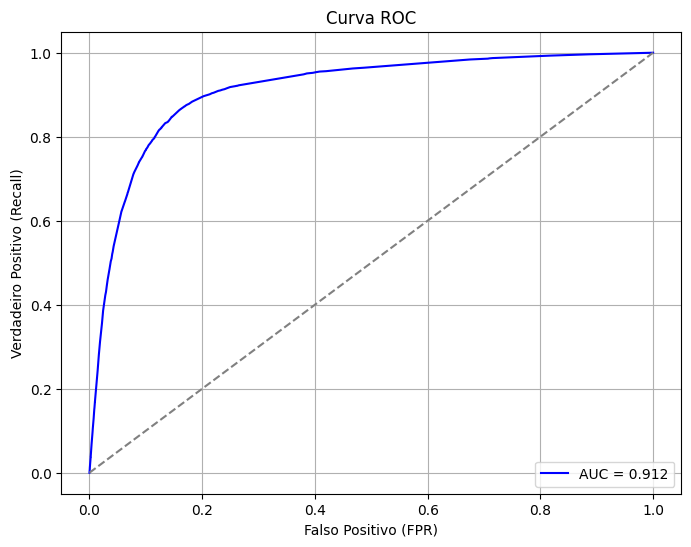

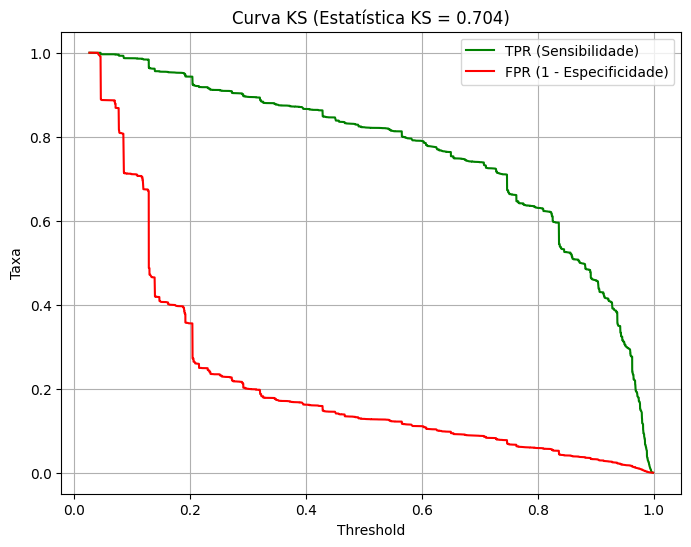


✅ Taxa de acerto por classe (em %):
           % Predito 0  % Predito 1
HIGH_RISK                          
0                87.19        12.81
1                17.75        82.25


In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Gera predições binárias com threshold padrão de 0.5
Covid_com_amostra['HIGH_RISK_PRED'] = (Covid_com_amostra['HIGH_RISK_PROB'] >= 0.5).astype(int)

# 2. Avaliação apenas na base de teste
df_teste = Covid_com_amostra[Covid_com_amostra['SAMPLE'] == 'TEST'].copy()
y_true = df_teste['HIGH_RISK'].astype(int)  # corrigido para int
y_pred = df_teste['HIGH_RISK_PRED']
y_score = df_teste['HIGH_RISK_PROB']

# 3. Matriz de confusão
cm = confusion_matrix(y_true, y_pred)
print("📊 Matriz de Confusão:")
print(cm)

# 4. Métricas principais
print("\n📈 Relatório de Classificação:")
print(classification_report(y_true, y_pred, digits=4))

# 5. Curva ROC e AUC
auc_score = roc_auc_score(y_true, y_score)
fpr, tpr, thresholds = roc_curve(y_true, y_score)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Falso Positivo (FPR)')
plt.ylabel('Verdadeiro Positivo (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# 6. Curva KS
ks_statistic = max(tpr - fpr)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Sensibilidade)', color='green')
plt.plot(thresholds, fpr, label='FPR (1 - Especificidade)', color='red')
plt.title(f'Curva KS (Estatística KS = {ks_statistic:.3f})')
plt.xlabel('Threshold')
plt.ylabel('Taxa')
plt.legend()
plt.grid()
plt.show()

# 7. Taxa de acerto por classe
acertos_por_classe = pd.crosstab(
    df_teste['HIGH_RISK'], df_teste['HIGH_RISK_PRED'], normalize='index'
) * 100
acertos_por_classe.columns = ['% Predito 0', '% Predito 1']

print("\n✅ Taxa de acerto por classe (em %):")
print(acertos_por_classe.round(2))


### **Interpretação do modelo de regressão logistica**
1.    O modelo de <b><font color="red">REGRESSÃO LOGÍSTICA </font></b> é bastante recomendado nesse caso, dado que tanto a variável resposta, quanto as variáveis preditoras são categóricas. O modelo estima a probabilidade do paciente evoluir a um quadro grave da doença, ou mesmo ir a óbito.
2.   O modelo está acertando mais de <b><font color="yellow">82% </font></b>dos casos de alto risco, o que é muito bom considerando que essa é a classe minoritária (evento raro) e essa taxa de acerto está bem equilibrada em ambas as classes (Pacientes com alto risco e com risco menor). Esse refere-se ao indicador chamado "Recall", a proporção de pacientes que realmente são graves/morrem e que foram corretamente identificados como tal pelo modelo.
3. No entanto, o indicador "Precision" do modelo, em torno de <b><font color="yellow">37% </font></b> para a categoria HIGH_RISK=1 é relatvamente baixo, dado que, quando o modelo prevê "alto risco", só <b><font color="yellow">37% </font></b> são realmente alto risco. "Precision" é a proporção dos pacientes que o modelo classificou como graves e que realmente são graves.
4. Podemos tentar mexer no ponto de corte do modelo (cujo padrão para classificação é 0.5) e avaliar como isso afeta as taxas de acerto e, inclusive, o indicador de Precisão.
5. Excluimos da modelagem a variável MEDICAL_UNIT por não haver conseguido identificado a coerência do poder preditivo dessa variável, por conta da ausência dos domínios da variável.

<font size="4">
<b><font color="red">Etapa 20</font></b>: Pesos das variáveis do modelo de regressão logística
</font>

In [20]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# 1. Filtra base de treino
df_treino = Covid_com_amostra[Covid_com_amostra['SAMPLE'] == 'TRAINING'].copy()

# 2. Define variáveis (sem MEDICAL_UNIT)
variaveis_explicativas = [
    'USMER', 'SEX', 'PNEUMONIA', 'PREGNANT',
    'DIABETES', 'COPD', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
    'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO',
    'COMORBIDITIES_TOTAL', 'RESPIRATORY_DISEASE', 'RISK_PREGNANT', 'AGE_RISK'
]
target = 'HIGH_RISK'

# 3. Dados como float
X_train = df_treino[variaveis_explicativas].astype(float)
y_train = df_treino[target].astype(float)

# 4. Adiciona constante
X_train_const = sm.add_constant(X_train)

# 5. Modelo Logístico
modelo = sm.Logit(y_train, X_train_const)
resultado = modelo.fit()

# 6. Cria DataFrame com os resultados
tabela = resultado.summary2().tables[1].reset_index()
tabela.columns = ['Variavel', 'Coeficiente', 'Erro_Padrao', 'z', 'p_valor', 'IC_Inf', 'IC_Sup']

# 7. Converte z para float (caso esteja como object)
tabela['z'] = pd.to_numeric(tabela['z'], errors='coerce')

# 8. Calcula campos adicionais
tabela['Significativo_5pct'] = tabela['p_valor'] < 0.05
tabela['Odds_Ratio'] = np.exp(tabela['Coeficiente'])

# 9. Separa constante
constante = tabela[tabela['Variavel'] == 'const']
variaveis = tabela[tabela['Variavel'] != 'const'].copy()

# 10. Ordena por |z| decrescente
variaveis_ordenadas = variaveis.reindex(variaveis['z'].abs().sort_values(ascending=False).index)

# 11. Recombina constante + variáveis ordenadas
tabela_final = pd.concat([constante, variaveis_ordenadas], ignore_index=True)

# 12. Exibe resultado
tabela_final[['Variavel', 'Coeficiente', 'z', 'Odds_Ratio', 'p_valor', 'Significativo_5pct']]


Optimization terminated successfully.
         Current function value: 0.180515
         Iterations 8


Variavel  Coeficiente           z  Odds_Ratio        p_valor  \
0                 const    -3.973883 -306.312225    0.018800   0.000000e+00   
1             PNEUMONIA     2.771348  238.083665   15.980161   0.000000e+00   
2              AGE_RISK     1.305563  101.474295    3.689766   0.000000e+00   
3                   SEX    -1.140290  -41.809343    0.319726   0.000000e+00   
4                 USMER     0.423521   36.784882    1.527330  3.221391e-296   
5         RISK_PREGNANT     0.727825   25.537808    2.070573  7.500400e-144   
6              DIABETES     0.378129   24.640880    1.459551  4.609305e-134   
7         OTHER_DISEASE     0.613081   22.550628    1.846110  1.323946e-112   
8         RENAL_CHRONIC     0.547859   19.671340    1.729547   3.796121e-86   
9   COMORBIDITIES_TOTAL     0.364499   19.365695    1.439792   1.503136e-83   
10              TOBACCO    -0.352082  -15.977964    0.703222   1.819950e-57   
11  RESPIRATORY_DISEASE    -0.432879  -10.618418    0.648639   2.446723e-26   
12         HIPERTENSION     0.157421   10.069973    1.170488   7.499837e-24   
13                 COPD     0.448007    8.852016    1.565189   8.595265e-19   
14              INMSUPR     0.248433    6.956435    1.282015   3.489907e-12   
15              OBESITY     0.107593    6.684029    1.113595   2.324601e-11   
16             PREGNANT     0.477815    5.171695    1.612547   2.319806e-07   
17       CARDIOVASCULAR    -0.006861   -0.237926    0.993162   8.119384e-01   

    Significativo_5pct  
0                 True  
1                 True  
2                 True  
3                 True  
4                 True  
5                 True  
6                 True  
7                 True  
8                 True  
9                 True  
10                True  
11                True  
12                True  
13                True  
14                True  
15                True  
16                True  
17               False

<font size="4">
<b><font color="red">Etapa 21</font></b>: Comparação das performances do modelo de regressão logística (antes e depois do ajuste do ponto de corte de classificação)
</font>

In [21]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score
)
import pandas as pd

# 1. Base de teste
df_teste = Covid_com_amostra[Covid_com_amostra['SAMPLE'] == 'TEST'].copy()
y_true = df_teste['HIGH_RISK'].astype(int)
y_score = df_teste['HIGH_RISK_PROB']

# 2. Função para avaliar performance em qualquer threshold
def avaliar_modelo(y_true, y_score, threshold):
    y_pred = (y_score >= threshold).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    taxa_acerto = pd.crosstab(
        y_true, y_pred, normalize='index'
    ) * 100
    taxa_acerto.columns = ['% Predito 0', '% Predito 1']

    return {
        'Threshold': threshold,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred),
        'AUC': roc_auc_score(y_true, y_score),
        'Confusion_Matrix': cm,
        'Taxa_Acerto': taxa_acerto.round(2)
    }

# 3. Avaliação para 3 thresholds
resultados = [avaliar_modelo(y_true, y_score, thr) for thr in [0.5, 0.6, 0.7]]

# 4. Comparar principais métricas
df_metricas = pd.DataFrame(resultados)[[
    'Threshold', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'
]]
print("📊 Comparação das métricas por ponto de corte:")
display(df_metricas.round(4))

# 5. Mostrar matrizes de confusão e taxa de acerto por classe
for r in resultados:
    print(f"\n🔹 Threshold = {r['Threshold']}")
    print("Matriz de Confusão:")
    print(r['Confusion_Matrix'])
    print("\nTaxa de Acerto por Classe (%):")
    print(r['Taxa_Acerto'])


📊 Comparação das métricas por ponto de corte:


Threshold  Accuracy  Precision  Recall  F1-score     AUC
0        0.5    0.8677     0.3710  0.8225    0.5113  0.9118
1        0.6    0.8808     0.3957  0.7898    0.5273  0.9118
2        0.7    0.8977     0.4362  0.7394    0.5487  0.9118


🔹 Threshold = 0.5
Matriz de Confusão:
[[162844  23932]
 [  3045  14113]]

Taxa de Acerto por Classe (%):
           % Predito 0  % Predito 1
HIGH_RISK                          
0                87.19        12.81
1                17.75        82.25

🔹 Threshold = 0.6
Matriz de Confusão:
[[166080  20696]
 [  3606  13552]]

Taxa de Acerto por Classe (%):
           % Predito 0  % Predito 1
HIGH_RISK                          
0                88.92        11.08
1                21.02        78.98

🔹 Threshold = 0.7
Matriz de Confusão:
[[170376  16400]
 [  4471  12687]]

Taxa de Acerto por Classe (%):
           % Predito 0  % Predito 1
HIGH_RISK                          
0                91.22         8.78
1                26.06        73.94


### **Insights sobre as comparações de ponto de corte (0.5, 0.6 e 0.7)**
1.    O aumento do ponto de corte de 0.5 para 0.7 impacta em um aumento no valor da precisão (de 37% para 43%), mas consequentemente impacta na redução do recall (de 82% para 74%), ou seja, o aumento da precisão nos ajuda a reduzir os falsos positivos classificados como alto risco, mas impacta na redução de acerto do modelo em identificar pacientes de alto risco. Entendemos que é melhor o modelo capturar um % mais alto dos casos reais de alto risco (recall), mesmo correndo o risco de que casos assinalados como alto risco sejam falsos positivos (precision). Assim, podemos manter o ponto de corte em 0.5.

<font size="4">
<b><font color="red">Etapa 22</font></b>: Modelo de random forest na BASE DE TREINAMENTO para predizer a probabilidade do paciente evoluir para um quadro grave (ou morte)
</font>

In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# 1. Separar base de treino e base completa
df_train = Covid_com_amostra[Covid_com_amostra['SAMPLE'] == 'TRAINING'].copy()
df_full = Covid_com_amostra.copy()

# 2. Definir variáveis do modelo (sem MEDICAL_UNIT)
variaveis_modelo = [
    'USMER', 'SEX', 'PNEUMONIA', 'PREGNANT',
    'DIABETES', 'COPD', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
    'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO',
    'COMORBIDITIES_TOTAL', 'RESPIRATORY_DISEASE', 'RISK_PREGNANT', 'AGE_RISK'
]

X_train = df_train[variaveis_modelo]
y_train = df_train['HIGH_RISK'].astype(int)

# 3. Treinar modelo Random Forest
modelo_rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
modelo_rf.fit(X_train, y_train)

# 4. Aplicar modelo em toda a base
X_full = df_full[variaveis_modelo]
df_full['HIGH_RISK_RF_PROB'] = modelo_rf.predict_proba(X_full)[:, 1]

# 5. Atualizar a base original
Covid_com_amostra['HIGH_RISK_RF_PROB'] = df_full['HIGH_RISK_RF_PROB']

print("✅ Modelo Random Forest treinado sem 'MEDICAL_UNIT'. Probabilidades armazenadas em 'HIGH_RISK_RF_PROB'.")

✅ Modelo Random Forest treinado sem 'MEDICAL_UNIT'. Probabilidades armazenadas em 'HIGH_RISK_RF_PROB'.


<font size="4">
<b><font color="red">Etapa 22</font></b>: Resultados do modelo de random forest para predizer a probabilidade de evolução a um quadro grave ou morte.
</font>

In [23]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, classification_report
)
import pandas as pd

# 1. Base de teste
df_teste_rf = Covid_com_amostra[Covid_com_amostra['SAMPLE'] == 'TEST'].copy()
y_true_rf = df_teste_rf['HIGH_RISK'].astype(int)
y_score_rf = df_teste_rf['HIGH_RISK_RF_PROB']

# 2. Aplicar ponto de corte
threshold = 0.5
y_pred_rf = (y_score_rf >= threshold).astype(int)

# 3. Métricas principais
accuracy_rf = accuracy_score(y_true_rf, y_pred_rf)
precision_rf = precision_score(y_true_rf, y_pred_rf, zero_division=0)
recall_rf = recall_score(y_true_rf, y_pred_rf)
f1_rf = f1_score(y_true_rf, y_pred_rf)
auc_rf = roc_auc_score(y_true_rf, y_score_rf)
cm_rf = confusion_matrix(y_true_rf, y_pred_rf)

# 4. Relatório detalhado
report_rf = classification_report(y_true_rf, y_pred_rf, target_names=['Classe 0', 'Classe 1'])

# 5. Taxa de acerto por classe
acerto_rf = pd.crosstab(y_true_rf, y_pred_rf, normalize='index') * 100
acerto_rf.columns = ['% Predito 0', '% Predito 1']
acerto_rf.index.name = 'HIGH_RISK'
acerto_rf = acerto_rf.round(2)

# 6. Exibição dos resultados
print("📊 Avaliação do modelo Random Forest (ponto de corte = 0.5):\n")

print("🔹 Matriz de Confusão:")
print(cm_rf)

print("\n🔹 Métricas de Performance:")
print(f"Acurácia   : {accuracy_rf:.4f}")
print(f"Precisão   : {precision_rf:.4f}")
print(f"Recall     : {recall_rf:.4f}")
print(f"F1-score   : {f1_rf:.4f}")
print(f"AUC        : {auc_rf:.4f}")

print("\n🔹 Relatório de Classificação:")
print(report_rf)

print("🔹 Taxa de Acerto por Classe (%):")
print(acerto_rf)


📊 Avaliação do modelo Random Forest (ponto de corte = 0.5):

🔹 Matriz de Confusão:
[[159053  27723]
 [  2723  14435]]

🔹 Métricas de Performance:
Acurácia   : 0.8507
Precisão   : 0.3424
Recall     : 0.8413
F1-score   : 0.4867
AUC        : 0.9057

🔹 Relatório de Classificação:
              precision    recall  f1-score   support

    Classe 0       0.98      0.85      0.91    186776
    Classe 1       0.34      0.84      0.49     17158

    accuracy                           0.85    203934
   macro avg       0.66      0.85      0.70    203934
weighted avg       0.93      0.85      0.88    203934

🔹 Taxa de Acerto por Classe (%):
           % Predito 0  % Predito 1
HIGH_RISK                          
0                85.16        14.84
1                15.87        84.13


<font size="4">
<b><font color="red">Etapa 23</font></b>: Importância das variáveis o modelo gerado a partir de Random Forest
</font>

/tmp/ipython-input-3751083874.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




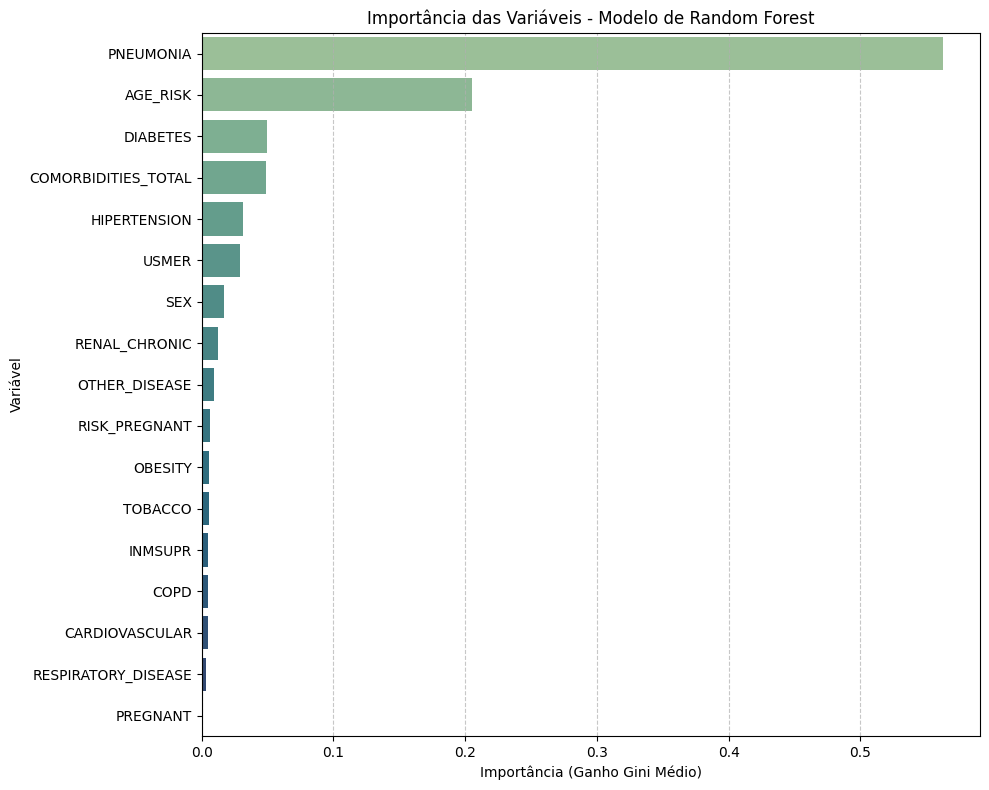

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Obter importâncias das variáveis
importancias = modelo_rf.feature_importances_
nomes_variaveis = np.array(variaveis_modelo)

# 2. Criar DataFrame e ordenar
df_importancia = pd.DataFrame({
    'Variável': nomes_variaveis,
    'Importância': importancias
}).sort_values(by='Importância', ascending=False)

# 3. Plotar gráfico
plt.figure(figsize=(10, 8))
sns.barplot(x='Importância', y='Variável', data=df_importancia, palette='crest')
plt.title('Importância das Variáveis - Modelo de Random Forest')
plt.xlabel('Importância (Ganho Gini Médio)')
plt.ylabel('Variável')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



<font size="4">
<b><font color="red">Etapa 24</font></b>: Comparação dos resultados dos modelos de regressão logística e random forest
</font>


In [25]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score
)
import pandas as pd

# 1. Base de teste
df_teste = Covid_com_amostra[Covid_com_amostra['SAMPLE'] == 'TEST'].copy()

# 2. Variável real
y_true = df_teste['HIGH_RISK'].astype(int)

# 3. Probabilidades dos dois modelos
y_score_log = df_teste['HIGH_RISK_PROB']
y_score_rf  = df_teste['HIGH_RISK_RF_PROB']

# 4. Função de avaliação com ponto de corte fixo
def avaliar_modelo(nome, y_score, y_true, threshold=0.5):
    y_pred = (y_score >= threshold).astype(int)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_score)

    acerto_classe = pd.crosstab(y_true, y_pred, normalize='index') * 100
    acerto_classe.columns = ['% Predito 0', '% Predito 1']
    acerto_classe.index = [f'{nome} - Classe 0', f'{nome} - Classe 1']
    acerto_classe = acerto_classe.round(2)

    return {
        'Modelo': nome,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1,
        'AUC': auc
    }, acerto_classe

# 5. Avaliar os dois modelos
metricas_log, acerto_log = avaliar_modelo('Regressão Logística', y_score_log, y_true)
metricas_rf,  acerto_rf  = avaliar_modelo('Random Forest', y_score_rf, y_true)

# 6. Criar DataFrames
df_metricas = pd.DataFrame([metricas_log, metricas_rf]).round(4)
df_acertos = pd.concat([acerto_log, acerto_rf])

# 7. Exibir
print("📊 Comparação das Métricas Gerais:")
display(df_metricas)

print("\n📊 Comparação da Taxa de Acerto por Classe (%):")
display(df_acertos)

📊 Comparação das Métricas Gerais:


Modelo  Accuracy  Precision  Recall  F1-score     AUC
0  Regressão Logística    0.8677     0.3710  0.8225    0.5113  0.9118
1        Random Forest    0.8507     0.3424  0.8413    0.4867  0.9057


📊 Comparação da Taxa de Acerto por Classe (%):


% Predito 0  % Predito 1
Regressão Logística - Classe 0        87.19        12.81
Regressão Logística - Classe 1        17.75        82.25
Random Forest - Classe 0              85.16        14.84
Random Forest - Classe 1              15.87        84.13

### **Insights sobre os resultados dos modelos de regressão logística e de random forest**
1.    De maneira geral, houve uma similaridade bastante importante em termos de performance dos 2 modelos
2.    O modelo de regressão logística levou ligeira vantagem nos principais indicadores (precision, recall, AUC) e acaba sendo o modelo favorito, não apenas pelos resultados, como também pela simplicidade do modelo, em comparação ao modelo de random forest (que é uma mistura de árvores de decisão).


<font size="4">
<b><font color="red">Etapa 25</font></b>: Modelo de árvore de classificação para estimação da probabilidade de um paciente evoluir a um estado grave ou óbito
</font>


In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# 1. Filtra a base de treinamento
df_treino = Covid_com_amostra[Covid_com_amostra['SAMPLE'] == 'TRAINING'].copy()

# 2. Define variáveis
target = 'HIGH_RISK'
variaveis_explicativas = [
    'USMER', 'SEX', 'PNEUMONIA', 'PREGNANT',
    'DIABETES', 'COPD', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
    'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO',
    'COMORBIDITIES_TOTAL', 'RESPIRATORY_DISEASE', 'RISK_PREGNANT', 'AGE_RISK'
]

# 3. Dados de treino
X_train = df_treino[variaveis_explicativas]
y_train = df_treino[target]

# 4. Modelo de árvore de decisão
modelo = DecisionTreeClassifier(
    max_depth=6,              # profundidade limitada para evitar overfitting
    class_weight='balanced',  # compensa a classe minoritária
    random_state=42
)

# 5. Treina o modelo
modelo.fit(X_train, y_train)

# 6. Aplica à base completa
X_todo = Covid_com_amostra[variaveis_explicativas]
Covid_com_amostra['HIGH_RISK_PROB_TREE'] = modelo.predict_proba(X_todo)[:, 1]

# 7. Visualiza as primeiras linhas
Covid_com_amostra[['HIGH_RISK', 'HIGH_RISK_PROB_TREE']].head()

HIGH_RISK  HIGH_RISK_PROB_TREE
0         0             0.141763
1         0             0.072371
2         0             0.072371
3         0             0.946101
4         0             0.815111


<font size="4">
<b><font color="red">Etapa 26</font></b>: Importância das variáveis do modelo de árvore de classificação
</font>


/tmp/ipython-input-695155730.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




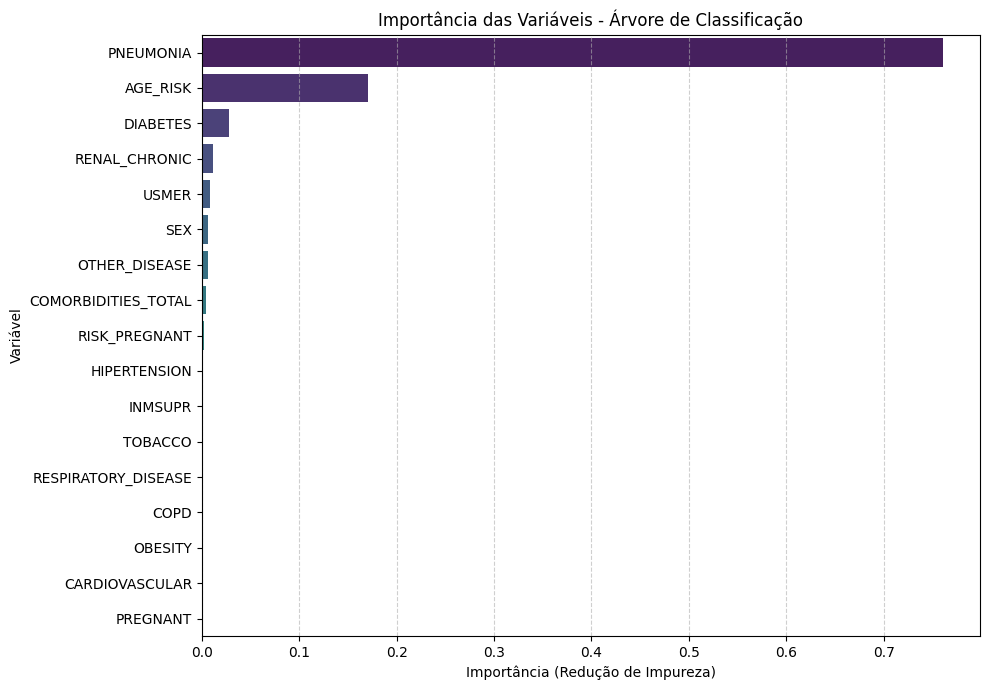

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 8. Obter importâncias
importancias = modelo.feature_importances_
variaveis = X_train.columns

# 9. Criar DataFrame com as importâncias
df_importancia = pd.DataFrame({
    'Variável': variaveis,
    'Importância': importancias
}).sort_values(by='Importância', ascending=False)

# 10. Plotar gráfico
plt.figure(figsize=(10, 7))
sns.barplot(x='Importância', y='Variável', data=df_importancia, palette='viridis')
plt.title('Importância das Variáveis - Árvore de Classificação')
plt.xlabel('Importância (Redução de Impureza)')
plt.ylabel('Variável')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



<font size="4">
<b><font color="red">Etapa 27</font></b>: Comparação dos 3 modelos: Regressão logística, Random Forest e Árvore de Classificação
</font>


In [28]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score
)
import pandas as pd

# 1. Base de teste
df_teste = Covid_com_amostra[Covid_com_amostra['SAMPLE'] == 'TEST'].copy()

# 2. Variável real
y_true = df_teste['HIGH_RISK'].astype(int)

# 3. Probabilidades dos três modelos
y_score_log   = df_teste['HIGH_RISK_PROB']
y_score_rf    = df_teste['HIGH_RISK_RF_PROB']
y_score_tree  = df_teste['HIGH_RISK_PROB_TREE']

# 4. Função de avaliação com ponto de corte fixo
def avaliar_modelo(nome, y_score, y_true, threshold=0.5):
    y_pred = (y_score >= threshold).astype(int)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_score)

    acerto_classe = pd.crosstab(y_true, y_pred, normalize='index') * 100
    acerto_classe.columns = ['% Predito 0', '% Predito 1']
    acerto_classe.index = [f'{nome} - Classe 0', f'{nome} - Classe 1']
    acerto_classe = acerto_classe.round(2)

    return {
        'Modelo': nome,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1,
        'AUC': auc
    }, acerto_classe

# 5. Avaliar os três modelos
metricas_log,   acerto_log   = avaliar_modelo('Regressão Logística', y_score_log, y_true)
metricas_rf,    acerto_rf    = avaliar_modelo('Random Forest', y_score_rf, y_true)
metricas_tree,  acerto_tree  = avaliar_modelo('Árvore de Decisão', y_score_tree, y_true)

# 6. Criar DataFrames consolidados
df_metricas = pd.DataFrame([metricas_log, metricas_rf, metricas_tree]).round(4)
df_acertos = pd.concat([acerto_log, acerto_rf, acerto_tree])

# 7. Exibir resultados
print("📊 Comparação das Métricas Gerais:")
display(df_metricas)

print("\n📊 Comparação da Taxa de Acerto por Classe (%):")
display(df_acertos)


📊 Comparação das Métricas Gerais:


Modelo  Accuracy  Precision  Recall  F1-score     AUC
0  Regressão Logística    0.8677     0.3710  0.8225    0.5113  0.9118
1        Random Forest    0.8507     0.3424  0.8413    0.4867  0.9057
2    Árvore de Decisão    0.8367     0.3243  0.8687    0.4723  0.9051


📊 Comparação da Taxa de Acerto por Classe (%):


% Predito 0  % Predito 1
Regressão Logística - Classe 0        87.19        12.81
Regressão Logística - Classe 1        17.75        82.25
Random Forest - Classe 0              85.16        14.84
Random Forest - Classe 1              15.87        84.13
Árvore de Decisão - Classe 0          83.37        16.63
Árvore de Decisão - Classe 1          13.13        86.87

### **Insights sobre os resultados dos modelos de regressão logística, random forest e árvore de classificação**
1.    De maneira geral, houve uma similaridade bastante importante em termos de performance dos 3 modelos
2.    O modelo de árvore de regressão logística levou ligeira vantagem sobre o modelo de random forest e de regressão logística em quase todos os principais indicadores (accuracy, precision, F1-score, AUC). Por questões de robustez e simplicidade do modelo de regressão logistica e consistência dos indicadores de performance,esse foi o modelo escolhido.


<font size="4">
<b><font color="red">Etapa 28</font></b>: Análise da estabilidade e capacidade de generalização do modelo logístico
</font>


In [29]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
import pandas as pd

# 1. Definir ponto de corte
threshold = 0.5

# 2. Inicializar lista para armazenar resultados
resultados_estabilidade = []

# 3. Avaliar por amostra
for sample in ['TRAINING', 'VALIDATION', 'TEST']:
    df_amostra = Covid_com_amostra[Covid_com_amostra['SAMPLE'] == sample].copy()
    y_true = df_amostra['HIGH_RISK'].astype(int)
    y_prob = df_amostra['HIGH_RISK_PROB']  # usa o modelo de Regressão Logística
    y_pred = (y_prob >= threshold).astype(int)

    # Calcular métricas
    auc = roc_auc_score(y_true, y_prob)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    resultados_estabilidade.append({
        'Amostra': sample,
        'AUC': round(auc, 4),
        'Accuracy': round(acc, 4),
        'Precision': round(prec, 4),
        'Recall': round(rec, 4),
        'F1-score': round(f1, 4)
    })

# 4. Gerar tabela final
df_resultados = pd.DataFrame(resultados_estabilidade)

# 5. Exibir
print("📊 Avaliação da Estabilidade do Modelo DE Regressão Logística:")
display(df_resultados)

📊 Avaliação da Estabilidade do Modelo DE Regressão Logística:


Amostra     AUC  Accuracy  Precision  Recall  F1-score
0    TRAINING  0.9118    0.8683     0.3725  0.8254    0.5133
1  VALIDATION  0.9121    0.8682     0.3725  0.8272    0.5137
2        TEST  0.9118    0.8677     0.3710  0.8225    0.5113

### **Insights sobre os resultados da regressão logística nas diferentes amostras**
1.    Não há qualquer sinal de overfitting do modelo. O mesmo apresentou performances bastante similares nas 3 amostras,  confirmando sua boa capacidade de generalização.


<font size="4">
<b><font color="red">Etapa 29</font></b>: Criar dataset so com a variável resposta e o score do modelo (entre 0 e 1000)
</font>


In [ ]:
# Criar nova base SCORE_DIST com HIGH_RISK, HIGH_RISK_PROB e score (entre 0 e 1000)
SCORE_DIST = Covid_com_amostra[['HIGH_RISK', 'HIGH_RISK_PROB']].copy()
SCORE_DIST['SCORE'] = (SCORE_DIST['HIGH_RISK_PROB'] * 1000).astype(int)

# Visualizar as primeiras linhas
SCORE_DIST.head()


HIGH_RISK  HIGH_RISK_PROB  SCORE
0         0        0.204572    204
1         0        0.139347    139
2         0        0.085429     85
3         0        0.937265    937
4         0        0.746962    746


<font size="4">
<b><font color="red">Etapa 30</font></b>: Análise do % de pacientes de alto risco por faixa de score
</font>


In [ ]:
import pandas as pd
import plotly.express as px

# 1. Garantir que HIGH_RISK seja numérico
SCORE_DIST['HIGH_RISK'] = pd.to_numeric(SCORE_DIST['HIGH_RISK'], errors='coerce')

# 2. Criar as faixas reais com qcut (decis)
SCORE_DIST['FAIXA_SCORE'] = pd.qcut(SCORE_DIST['SCORE'], q=10, duplicates='drop')

# 3. Converter os intervalos para string (ex: '132–258')
SCORE_DIST['FAIXA_SCORE_LABEL'] = SCORE_DIST['FAIXA_SCORE'].apply(lambda x: f'{int(x.left)}–{int(x.right)}')

# 4. Calcular % de alto risco por faixa real
tabela_decis = (
    SCORE_DIST.groupby('FAIXA_SCORE_LABEL', observed=False)['HIGH_RISK']
    .mean()
    .reset_index()
    .rename(columns={'HIGH_RISK': 'PERCENTUAL_ALTO_RISCO'})
)
tabela_decis['PERCENTUAL_ALTO_RISCO'] *= 100

# 5. Gráfico com título centralizado na faixa branca
fig = px.bar(
    tabela_decis,
    x='FAIXA_SCORE_LABEL',
    y='PERCENTUAL_ALTO_RISCO',
    text='PERCENTUAL_ALTO_RISCO',
    labels={
        'FAIXA_SCORE_LABEL': 'Faixa de Score',
        'PERCENTUAL_ALTO_RISCO': '% de Alto Risco'
    }
)

fig.update_layout(
    title={
        'text': '<b>% PACIENTES ALTO RISCO POR FAIXA DE SCORE (REGRESSÃO LOGÍSTICA)</b>',
        'y': 0.95,  # ajusta para o meio da faixa branca
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    yaxis_title='% de Alto Risco',
    xaxis_title='Faixa de Score',
    margin=dict(t=80),  # margem ajustada para equilibrar visualmente
    uniformtext_minsize=8
)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.show()


### **Insights sobre a coerência do resultado do score gerado**
1.    Um dos sinais claros da robustez de um modelo de score é a coerência da tendência do resultado ao longo das faixas de score. Nesse caso, o % de pacientes com alto risco evolui de maneira progressiva ao longo das faixas, sem nenhuma interrupção da tendência. De maneira mais objetiva, o % de pacientes com alto risco (no geral) é de cerca de 9%, possuindo graus de incidência muito mais elevados (19,92% e 51,10%, respectivamente) nas 2 últimas faixas de score.